Waste Management using CNN


In [1]:
pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.0/39.5 MB 653.6 kB/s eta 0:01:01
   ---------------------------------------- 0.1/39.5 MB 1.0 MB/s eta 0:00:39
   ---------------------------------------- 0.2/39.5 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.3/39.5 MB 1.4 MB/s eta 0:00:29
    --------------------------------------- 0.6/39.5 MB 2.0 MB/s eta 0:00:20
   - -------------------------------------- 1.1/39.5 MB 3.3 MB/s eta 0:00:12
   -- ------------------------------------- 2.1/39.5 MB 5.7 MB/s eta 0:00:07
   --- ------------------------------------ 3.0/39.5 MB 7.4 MB/s eta 0:00:05
   --- ------------------------------------ 3.5/39.5 MB 8.5 MB/s eta 0:00:05
   --- ------------------------------------ 3.5/39.5 MB 8.5 MB/s eta 0:00:05
   ---- ----------------------------------- 4.4/39.5 MB 8.2 MB/s eta 0:00:05
   -

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Paths to the dataset
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

# Visualization
x_data = []
y_data = []

# Loop through each category
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Fixed function name
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

# Create a DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Display shape
data.shape

100%|██████████████████████████████████████████████████████████████████████████████| 9999/9999 [02:13<00:00, 74.96it/s]


(22564, 2)

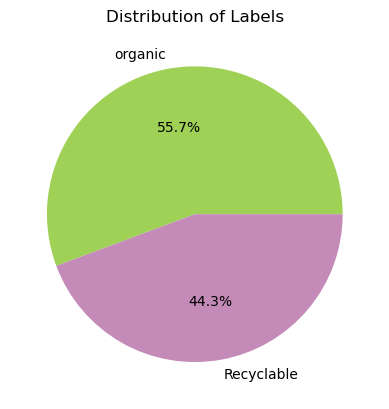

In [2]:
colors=['#a0d157','#c48bb8']
plt.pie(data['label'].value_counts(), labels=['organic', 'Recyclable'], colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Labels')
plt.show()